## Imports

In [98]:
import numpy as np
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import json
import copy
from plotly.subplots import make_subplots
from scipy.spatial.distance import cosine
from sklearn.preprocessing import normalize
from datetime import datetime
import statistics

In [58]:
# data = json.load(open('research/output/youtube_data.json'))
data = json.load(open('research/output/youtube_data_new.json'))

In [59]:
for video, values in data.items():
    print(values)
    break

{'annots': ['Social Identity', 'Reciprocity', 'Social Proof'], 'publishedAt': '2017-09-14', 'title': 'American Vandal Clip Ball Hairs Netflix', 'description': "The devil is in the dicktails. American Vandal launches this Friday on Netflix. For the latest on #WhoDrewTheDicks, join our Official Group on Facebook. NetflixNetflix is the world's leading internet entertainment service with 130 million memberships in over 190 countries enjoying TV series, documentaries and feature films across a wide variety of genres and languages. Members can watch as much as they want, anytime, anywhere, on any internet-connected screen. Members can play, pause and resume watching, all without commercials or commitments.Connect with Netflix OnlineVisit Netflix WEBSITE Netflix on FACEBOOK Netflix on TWITTER Netflix on INSTAGRAM Netflix on TUMBLR Vandal Clip Ball Hairs Netflix", 'tags': "['WhoDrewTheDicks']", 'viewCount': 95654.0, 'likeCount': 922, 'topicCategories': 'Entertainment', 'channelTitle': 'Netflix

## Processing

In [60]:
persuasions = ["Social Identity", "Concreteness", "Anchoring and Comparison", "Overcoming Reactance", "Reciprocity",
"Foot in the Door", "Authority", "Social Impact", "Anthropomorphism", "Scarcity", "Social Proof", "Unclear"]
sector_list = {"Technology": "#19A7CE", 
               "Media": "#F24C3D", 
               "Retailing and Apparel": "#F2BE22", 
               "Finance": "#00DFA2", 
               "Food and Household": "#F97B22", 
               "Wholesalers, Industrials and Energy": "#77037B", 
               "Transportation": "#413543",
               "Aerospace and Defence": "#090580",
               "Healthcare": "#FFACAC"}
year_list = ["Before 2014", '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

In [61]:
frequency = {}
for video, values in data.items():
    for i, strat in enumerate(values["annots"]):
        if strat not in frequency:
            frequency[strat] = {"overall":0}
        frequency[strat]["overall"] += 1

In [62]:
df = pd.DataFrame.from_dict(frequency).T

In [63]:
companies = {}
for video, values in data.items():
    company = values["channelTitle"]
    if company not in companies:
        companies[company] = {"count":0, "videos":{}}
    y = values["publishedAt"][0:4]
    if int(y) <= 2013:
        y = "Before 2014"
    companies[company]["count"] += 1
    # companies[company]["videos"][video] = {"annots":values["annots"], "publishedAt":values["publishedAt"], "publishedIn": y, "likeCount": values["likeCount"],
    #                                      "viewCount":values["viewCount"], "videoTag":"video "+str(companies[company]["count"]), "commentCount":values["commentCount"]}
    companies[company]["videos"][video] = {"annots":values["annots"], "publishedAt":values["publishedAt"], "publishedIn": y, "likeCount": values["likeCount"],
                                         "viewCount":values["viewCount"], "videoTag":"video "+str(companies[company]["count"])}
companies = dict(sorted(companies.items(), key=lambda item: item[0]))

In [64]:
for a, values in data.items():
    print(values)
    break

{'annots': ['Social Identity', 'Reciprocity', 'Social Proof'], 'publishedAt': '2017-09-14', 'title': 'American Vandal Clip Ball Hairs Netflix', 'description': "The devil is in the dicktails. American Vandal launches this Friday on Netflix. For the latest on #WhoDrewTheDicks, join our Official Group on Facebook. NetflixNetflix is the world's leading internet entertainment service with 130 million memberships in over 190 countries enjoying TV series, documentaries and feature films across a wide variety of genres and languages. Members can watch as much as they want, anytime, anywhere, on any internet-connected screen. Members can play, pause and resume watching, all without commercials or commitments.Connect with Netflix OnlineVisit Netflix WEBSITE Netflix on FACEBOOK Netflix on TWITTER Netflix on INSTAGRAM Netflix on TUMBLR Vandal Clip Ball Hairs Netflix", 'tags': "['WhoDrewTheDicks']", 'viewCount': 95654.0, 'likeCount': 922, 'topicCategories': 'Entertainment', 'channelTitle': 'Netflix

In [29]:
top_5_companies = sorted(companies.items(), key=lambda x: x[1]["count"], reverse=True)[:5]
top_5_company_names = [company[0] for company in top_5_companies]

In [30]:
sectors = {}
for sector in sector_list:
    sectors[sector] = {"count":0, "num_companies":0, "videos":{}}

for video, values in data.items():
    sec = values["sector"]
    company = values["channelTitle"]
    for sector in sectors:
        if sec in sector:
            y = values["publishedAt"][0:4]
            if int(y) <= 2013:
                y = "Before 2014"
            sectors[sector]["count"] += 1
            sectors[sector]["videos"][video] = {"annots":values["annots"], "commentCount": values['commentCount'], "channelTitle":company, "publishedIn": y, "likeCount": values["likeCount"],
                                                 "viewCount":values["viewCount"], "videoTag":"video "+str(companies[company]["count"])}

KeyError: 'sector'

In [ ]:
sector_list_org = {"Technology": {}, "Media": {}, "Retailing": {}, "Apparel": {}, "Finance": {}, "Food": {}, "Household": {}, 
               "Wholesalers": {}, "Industrials": {}, "Energy": {}, "Transportation": {}, "Aerospace and Defence": {}, "Healthcare": {}}
for video, values in data.items():
    sector = values["sector"]
    company = values["channelTitle"]
    if company not in sector_list_org:
        sector_list_org[values["sector"]][company] = 0

for sector in sector_list_org:
    sector_list_org[sector] = len(sector_list_org[sector])

In [11]:
for sector, vals in sectors.items():
    unique_comp = {}
    for _, content in vals["videos"].items():
        unique_comp[content["channelTitle"]] = 0
    vals["num_companies"] = len(unique_comp)

# Company

## Company

In [65]:
company_views = {}
company_likes = {}
company_comments = {}
company_outreach = {}
company_engagement = {}
company_video_freq = {}
company_strategy = {}


for company, content in companies.items():
    company_views[company] = 0
    company_likes[company] = 0
    company_comments[company] = 0
    company_video_freq[company] = 0
    company_strategy[company] = {}
    for persuasion in persuasions:
        company_strategy[company][persuasion] = 0
    
    for video, values in content["videos"].items():
        strategies = values["annots"]
        company_views[company] += values["viewCount"]
        company_likes[company] += values["likeCount"]
        # company_comments[company] += values["commentCount"]
        company_comments[company] = 0
        company_video_freq[company] += 1
        for strat in strategies:
            
            company_strategy[company][strat] += 1
                
    company_outreach[company] = company_views[company]/company_video_freq[company]
    # company_outreach[company] = company_views[company]
    company_engagement[company] = ((company_likes[company] + company_comments[company])/company_views[company])*company_video_freq[company]

sorted_company_outreach = dict(sorted(company_outreach.items(), key=lambda item: item[1], reverse=True))
sorted_company_engagement = dict(sorted(company_engagement.items(), key=lambda item: item[1], reverse=True))

In [ ]:
for company, content in companies.items():
    if company == 'WWE':
        print(company, content)
        break

In [66]:
company_data = {
    "Company": list(companies.keys()),
    "Views": list(company_views.values()),
    "Frequency": list(company_video_freq.values()),
    "Likes": list(company_likes.values()),
    "Comments": list(company_comments.values()),
    "Outreach": list(company_outreach.values()),
    "Engagement": list(company_engagement.values())
}

companies_df = pd.DataFrame(company_data)

def sort_dataframe(companies_df, attribute, ascending=True):
    return df.sort_values(by=attribute, ascending=ascending)

In [111]:
companies_df.sort_values(by="Likes", ascending=False).head(10)

Company       Views  Frequency      Likes  Comments  \
220        HYBE LABELS         NaN        384  139300795         0   
53           BANGTANTV         NaN        202   48249156         0   
530                WWE         NaN       1295   11227369         0   
410      Rooster Teeth         NaN        730   10133100         0   
2         1theK (원더케이)         NaN        896    9527344         0   
130                 DC         NaN        446    5406081         0   
380              Pixar         NaN        234    4578230         0   
479          The Onion         NaN        227    3798544         0   
56                 BTS         NaN          3    3476393         0   
241  JYP Entertainment  44755159.0         33    3442771         0   

         Outreach  Engagement  
220           NaN         NaN  
53            NaN         NaN  
530           NaN         NaN  
410           NaN         NaN  
2             NaN         NaN  
130           NaN         NaN  
380           NaN         NaN  
479           NaN         NaN  
56            NaN         NaN  
241  1.356217e+06    2.538511

**Interesting Insights**

Only 4 videos of coors light but few viral with 22M, 15M views
Only 15 second videos
Fewer than 100 likes and comments

Molson Coors' 2022 U.S. ad spending totaled $692 million, according to the Ad Age Datacenter.
The campaign won in the Design/Brand category at The Drum Awards for Marketing Americas 2023

**Intersting Insights**

Netflix kind of noise in our dataset? No real ads, but trailers of movies and series

Apple has surprisingly high engagement, even with comments disabled in all its videos

In [70]:
company_hypotheses = []

# Hypothesis 1: High Engagement Companies
high_engagement_companies = companies_df[companies_df['Engagement'] > 4*companies_df['Engagement'].mean()]
company_hypotheses.append("High Engagement Companies: " + str(high_engagement_companies['Company'].tolist()))

# Hypothesis 2: Most Viewed Companies
most_viewed_companies = companies_df[companies_df['Views'] == companies_df['Views'].max()]
company_hypotheses.append("Most Viewed Companies: " + str(most_viewed_companies['Company'].tolist()))

# Hypothesis 3: Correlation Between Likes and Comments
highest_corr_company = companies_df.loc[companies_df['Engagement'].idxmax()]['Company']
correlation_likes_comments = companies_df.corr().loc['Likes', 'Comments']
company_hypotheses.append(f"Company with the Highest Engagement: {highest_corr_company} (Correlation: {correlation_likes_comments:.2f})")

outreach_engagement_company = companies_df[companies_df['Outreach'] * companies_df['Engagement'] > companies_df['Outreach'].mean() * companies_df['Engagement'].mean()]
company_hypotheses.append("Companies with highest Outreach and Engagement: " + str(outreach_engagement_company['Company'].tolist()))

# Print hypotheses
for hypothesis in company_hypotheses:
    print(hypothesis)

High Engagement Companies: ['GameGrumps', 'GameSpot', 'JYP Entertainment', 'Jomboy Media', 'League of Legends', 'Netflix', 'Nintendo of America', 'PlayOverwatch', 'Roblox', 'Tasty']
Most Viewed Companies: ['Myntra']
Company with the Highest Engagement: JYP Entertainment (Correlation: nan)
Companies with highest Outreach and Engagement: ['A24', 'ALTT', 'DAZN Boxing', 'DEATH BATTLE!', 'Dumb Ways to Die', 'GameGrumps', 'GameSpot', 'Genshin Impact', 'Guinness World Records', 'Hot Wheels', 'JYP Entertainment', 'Jomboy Media', 'Kurzgesagt – In a Nutshell', 'LEGO', 'League of Legends', 'Minecraft', 'Miss Universe', 'MondoMedia', 'Monster High', 'Netflix', 'Nintendo of America', 'PAYDAY 3', 'PUBG MOBILE', "Pinkfong Baby Shark - Kids' Songs & Stories", 'PlayOverwatch', 'Roblox', 'SYBO TV', 'South China Morning Post', 'Tasty', 'Telltale Games', 'Warner Bros. Pictures', 'h3h3Productions', 'realme India']


## Strategies

In [72]:
# Initialize dictionaries to store data per persuasion strategy
persuasion_views = {}
persuasion_likes = {}
persuasion_comments = {}
persuasion_views_list = {}
persuasion_likes_list = {}
persuasion_comments_list = {}
persuasion_engagement = {}
persuasion_outreach = {}
persuasion_video_frequency = {}
persuasion_engagement = {}
persuasion_outreach = {}
persuasion_engagement_list = {}
persuasion_outreach_list = {}

# Initialize a list to store plot dictionaries for updating visibility
plot_dicts = []

# Loop over all companies and their content
for company, content in companies.items():
    for video, values in content["videos"].items():
        strats = values["annots"]
        viewcount = values["viewCount"]
        likecount = values["likeCount"]
        # commentcount = values["commentCount"]
        commentcount = 0
        for strat in strats:
            # Initialize the data for each persuasion strategy
            if strat not in persuasion_views:
                persuasion_views[strat] = 0
                persuasion_likes[strat] = 0
                persuasion_comments[strat] = 0
                persuasion_views_list[strat] = []
                persuasion_likes_list[strat] = []
                persuasion_comments_list[strat] = []
                persuasion_video_frequency[strat] = 0
                persuasion_engagement[strat] = 0
                persuasion_outreach[strat] = 0
                persuasion_engagement_list[strat] = []
                persuasion_outreach_list[strat] = []

            # Update data for each persuasion strategy
            persuasion_views[strat] += viewcount
            persuasion_likes[strat] += likecount
            persuasion_comments[strat] += commentcount
            persuasion_views_list[strat].append(viewcount)
            persuasion_likes_list[strat].append(likecount)
            persuasion_comments_list[strat].append(commentcount)
            persuasion_video_frequency[strat] += 1
            persuasion_engagement[strat] += (likecount + commentcount)/viewcount
            persuasion_outreach[strat] += viewcount/len(persuasion_views_list[strat])
            persuasion_engagement_list[strat].append((likecount + commentcount)/viewcount)
            persuasion_outreach_list[strat].append(viewcount/len(persuasion_views_list[strat]))

# Calculate engagement for each persuasion strategy
for strat in persuasion_views:
    if persuasion_views[strat] != 0 and persuasion_video_frequency[strat] != 0:
        persuasion_engagement[strat] = ((persuasion_likes[strat] + persuasion_comments[strat]) / persuasion_views[strat])# * persuasion_video_frequency[strat]

for strat in persuasion_views:
    if persuasion_video_frequency[strat] != 0:
        persuasion_outreach[strat] = persuasion_views[strat] / persuasion_video_frequency[strat]

In [73]:
sorted_likes = sorted(persuasion_likes.items(), key=lambda x: x[1], reverse=True)
sorted_views = sorted(persuasion_views.items(), key=lambda x: x[1], reverse=True)
sorted_comments = sorted(persuasion_comments.items(), key=lambda x: x[1], reverse=True)
sorted_frequency = sorted(persuasion_video_frequency.items(), key=lambda x: x[1], reverse=True)

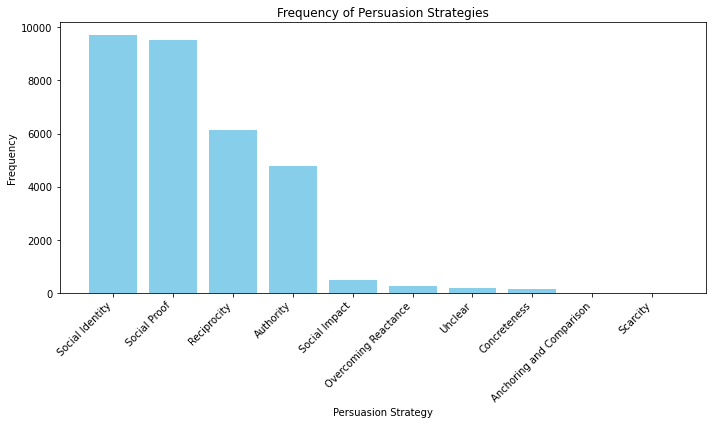

In [74]:
keys, values = zip(*sorted_frequency)

plt.figure(figsize=(10, 6))
plt.bar(keys, values, color='skyblue')

plt.xlabel('Persuasion Strategy')
plt.ylabel('Frequency')
plt.title('Frequency of Persuasion Strategies')

plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

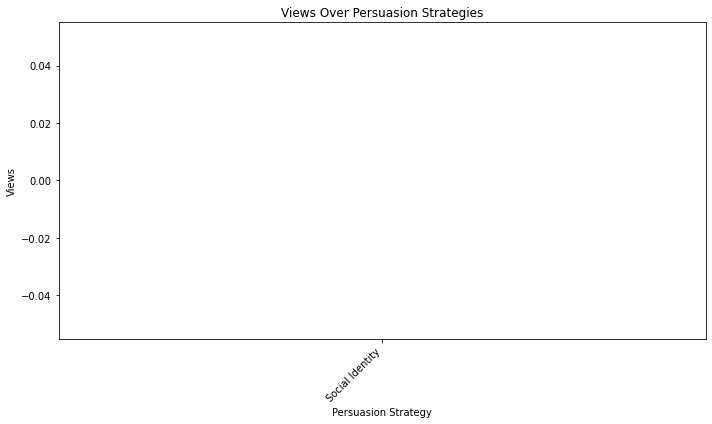

In [75]:
keys, values = zip(*sorted_views)

plt.figure(figsize=(10, 6))
plt.bar(keys, values, color='skyblue')

plt.xlabel('Persuasion Strategy')
plt.ylabel('Views')
plt.title('Views Over Persuasion Strategies')

plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

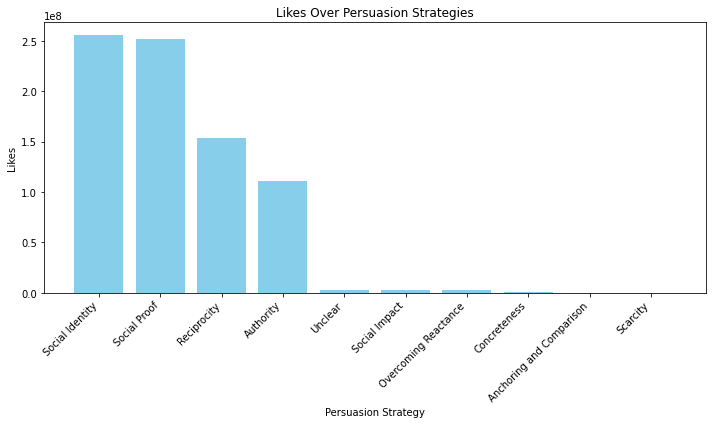

In [76]:
keys, values = zip(*sorted_likes)

plt.figure(figsize=(10, 6))
plt.bar(keys, values, color='skyblue')

plt.xlabel('Persuasion Strategy')
plt.ylabel('Likes')
plt.title('Likes Over Persuasion Strategies')

plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

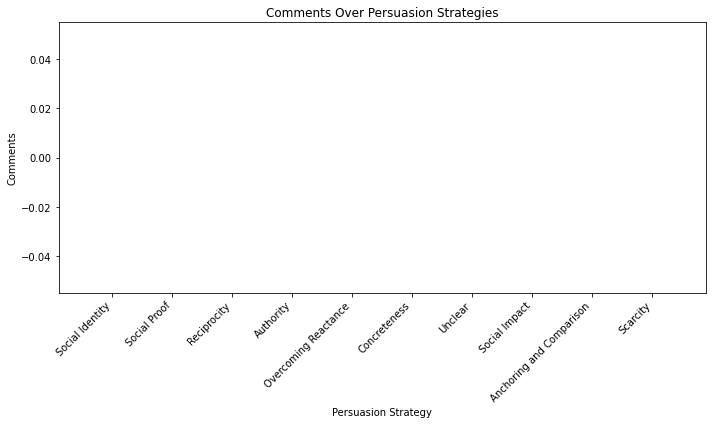

In [77]:
keys, values = zip(*sorted_comments)

plt.figure(figsize=(10, 6))
plt.bar(keys, values, color='skyblue')

plt.xlabel('Persuasion Strategy')
plt.ylabel('Comments')
plt.title('Comments Over Persuasion Strategies')

plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

**Hypothesis:** Anthropomorphism has significantly high likes to views and comments to views ratio/consistently high engagement

**Hypothesis:** Despite high frequency and views reciprocity ranks lower in engagement

**Hypothesis:** Scarcity and Social Proof are underutilised strategies

In [78]:
strategies_data = {
    "Strategy": list(persuasion_views.keys()),
    "Views": list(persuasion_views.values()),
    "Likes": list(persuasion_likes.values()),
    "Comments": list(persuasion_comments.values()),
    "Engagement": list(persuasion_engagement.values()),
    "Outreach": list(persuasion_outreach.values()),
    "Frequency": list(persuasion_video_frequency.values())
}

strategies_df = pd.DataFrame(strategies_data)

In [110]:
strategies_df.sort_values(by="Frequency", ascending=False)

Strategy  Views      Likes  Comments  Engagement  Outreach  \
0           Social Identity    NaN  255456424         0         NaN       NaN   
1              Social Proof    NaN  252219235         0         NaN       NaN   
2               Reciprocity    NaN  153566816         0         NaN       NaN   
3                 Authority    NaN  111146323         0         NaN       NaN   
7             Social Impact    NaN    2940119         0         NaN       NaN   
4      Overcoming Reactance    NaN    2810037         0         NaN       NaN   
6                   Unclear    NaN    3095796         0         NaN       NaN   
5              Concreteness    NaN    1298066         0         NaN       NaN   
8  Anchoring and Comparison    NaN      18037         0         NaN       NaN   
9                  Scarcity    NaN      12694         0         NaN       NaN   

   Frequency  
0       9697  
1       9515  
2       6141  
3       4777  
7        488  
4        275  
6        189  
5        166  
8         13  
9          4

In [ ]:
strategy_hypotheses = []

# Hypothesis 1: High Engagement with Specific Strategies
high_engagement_strategies = strategies_df[strategies_df['Engagement'] > strategies_df['Engagement'].mean()]
strategy_hypotheses.append("Strategies with high engagement: " + str(high_engagement_strategies['Strategy'].tolist()))

# Hypothesis 2: Underutilized Strategies
underutilized_strategies = strategies_df[(strategies_df['Frequency'] > strategies_df['Frequency'].mean()) & (strategies_df['Engagement'] < strategies_df['Engagement'].mean())]
strategy_hypotheses.append("Underutilized strategies: " + str(underutilized_strategies['Strategy'].tolist()))

# Hypothesis 3: Strategy with the Highest Likes-to-Views Ratio
highest_likes_to_views = strategies_df[strategies_df['Likes'] / strategies_df['Views'] == strategies_df['Likes'] / strategies_df['Views'].max()]
strategy_hypotheses.append("Strategy with the highest likes-to-views ratio: " + str(highest_likes_to_views['Strategy'].values[0]))

# Hypothesis 4: Strategy with the Highest Comments-to-Views Ratio
highest_comments_to_views = strategies_df[strategies_df['Comments'] / strategies_df['Views'] == strategies_df['Comments'] / strategies_df['Views'].max()]
strategy_hypotheses.append("Strategy with the highest comments-to-views ratio: " + str(highest_comments_to_views['Strategy'].values[0]))

# Print strategy hypotheses
for hypothesis in strategy_hypotheses:
    print(hypothesis)

In [ ]:
_, likes_values = zip(*sorted_likes)
_, views_values = zip(*sorted_views)
_, comments_values = zip(*sorted_comments)

plot_data = pd.DataFrame({
    'Likes': likes_values,
    # 'Views': views_values,
    'Comments': comments_values
})

plt.figure(figsize=(10, 6))
sns.kdeplot(likes_values, shade=True, color='skyblue')
# sns.kdeplot(data=plot_data, shade=True)

plt.xlabel('Likes')
plt.ylabel('Density')
plt.title('Distribution of Likes')

plt.tight_layout()
plt.show()

In [100]:
mean_likes = []
stdev_likes = []
for strat in persuasion_likes:
    mean_likes.append((strat, statistics.mean(persuasion_likes_list[strat])))
    stdev_likes.append((strat, statistics.stdev(persuasion_likes_list[strat])))

In [102]:
for a in mean_likes:
    print(a)

('Social Identity', 26343.861400433125)
('Social Proof', 26507.53914871256)
('Reciprocity', 25006.8093144439)
('Authority', 23266.97153024911)
('Overcoming Reactance', 10218.316363636364)
('Concreteness', 7819.674698795181)
('Unclear', 16379.873015873016)
('Social Impact', 6024.834016393443)
('Anchoring and Comparison', 1387.4615384615386)
('Scarcity', 3173.5)


In [103]:
likes_consistency = []
for strat in persuasion_likes:
    m = statistics.mean(persuasion_likes_list[strat])
    c = 0
    for vid in persuasion_likes_list[strat]:
        if vid > m:
            c += 1
    likes_consistency.append((strat, (c/persuasion_video_frequency[strat])))

In [104]:
for strat, c in sorted(likes_consistency):
    print(strat, c*100)

Anchoring and Comparison 23.076923076923077
Authority 8.60372618798409
Concreteness 21.686746987951807
Overcoming Reactance 20.363636363636363
Reciprocity 12.7177984041687
Scarcity 25.0
Social Identity 11.21996493760957
Social Impact 13.524590163934427
Social Proof 11.203363110877563
Unclear 6.878306878306878


In [105]:
engagement_consistency = []
for strat in persuasion_engagement:
    m = statistics.mean(persuasion_engagement_list[strat])
    c = 0
    for vid in persuasion_engagement_list[strat]:
        if vid > m:
            c += 1
    engagement_consistency.append((strat, (c/persuasion_video_frequency[strat])))

In [106]:
for strat, c in sorted(engagement_consistency):
    print(strat, c*100)

Anchoring and Comparison 0.0
Authority 0.0
Concreteness 0.0
Overcoming Reactance 0.0
Reciprocity 0.0
Scarcity 0.0
Social Identity 0.0
Social Impact 0.0
Social Proof 0.0
Unclear 0.0


In [107]:
outreach_consistency = []
for strat in persuasion_outreach:
    m = statistics.mean(persuasion_outreach_list[strat])
    c = 0
    for vid in persuasion_outreach_list[strat]:
        if vid > m:
            c += 1
    outreach_consistency.append((strat, (c/persuasion_video_frequency[strat])))

In [108]:
for strat, c in sorted(outreach_consistency):
    print(strat, c*100)

Anchoring and Comparison 0.0
Authority 0.0
Concreteness 0.0
Overcoming Reactance 0.0
Reciprocity 0.0
Scarcity 0.0
Social Identity 0.0
Social Impact 0.0
Social Proof 0.0
Unclear 0.0


In [43]:
likes_to_views = []

for strat in persuasion_views:
    if strat in persuasion_likes and persuasion_views[strat] != 0:
        likes = persuasion_likes[strat]
        views = persuasion_views[strat]
        ratio = likes / views
        likes_to_views.append((strat, ratio))

sorted_likes_to_views = sorted(likes_to_views, key=lambda x: x[1], reverse=True)

for strat, ratio in sorted_likes_to_views:
    print(f'Strategy: {strat}, Likes-to-Views Ratio: {ratio:.5f}')

Strategy: Authority, Likes-to-Views Ratio: 0.00776
Strategy: Anthropomorphism, Likes-to-Views Ratio: 0.00551
Strategy: Social Impact, Likes-to-Views Ratio: 0.00463
Strategy: Anchoring and Comparison, Likes-to-Views Ratio: 0.00440
Strategy: Unclear, Likes-to-Views Ratio: 0.00333
Strategy: Concreteness, Likes-to-Views Ratio: 0.00302
Strategy: Social Proof, Likes-to-Views Ratio: 0.00230
Strategy: Social Identity, Likes-to-Views Ratio: 0.00222
Strategy: Overcoming Reactance, Likes-to-Views Ratio: 0.00207
Strategy: Reciprocity, Likes-to-Views Ratio: 0.00196
Strategy: Foot in the Door, Likes-to-Views Ratio: 0.00194
Strategy: Scarcity, Likes-to-Views Ratio: 0.00081


In [ ]:
import matplotlib.pyplot as plt

# Initialize dictionaries to store data per persuasion strategy
persuasion_views = {}
persuasion_likes = {}

# Loop over all companies and their content
for company, content in companies.items():
    for video, values in content["videos"].items():
        strats = values["annots"]
        viewcount = values["viewCount"]
        likecount = values["likeCount"]
        for strat in strats:
            # Initialize the data for each persuasion strategy
            if strat not in persuasion_views:
                persuasion_views[strat] = []
                persuasion_likes[strat] = []

            # Append views and likes for each video to the respective lists
            persuasion_views[strat].append(viewcount)
            persuasion_likes[strat].append(likecount)

# Create a plot for each persuasion strategy
for strat, views_list in persuasion_views.items():
    likes_list = persuasion_likes[strat]
    
    # Create a scatter plot of views vs. likes for this persuasion strategy
    plt.scatter(views_list, likes_list, label=strat)

# Add labels and a legend
plt.xlabel('Views')
plt.ylabel('Likes')
plt.title('Scatter Plot of Likes vs. Views by Persuasion Strategy')
plt.legend()

# Show the plot
plt.show()

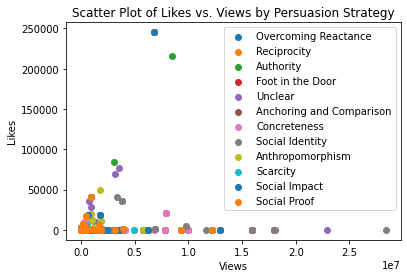

In [402]:
import matplotlib.pyplot as plt

# Initialize dictionaries to store data per persuasion strategy
persuasion_views = {}
persuasion_likes = {}

# Loop over all companies and their content
for company, content in companies.items():
    for video, values in content["videos"].items():
        strats = values["annots"]
        viewcount = values["viewCount"]
        likecount = values["likeCount"]
        for strat in strats:
            # Initialize the data for each persuasion strategy
            if strat not in persuasion_views:
                persuasion_views[strat] = []
                persuasion_likes[strat] = []

            # Append views and likes for each video to the respective lists
            persuasion_views[strat].append(viewcount)
            persuasion_likes[strat].append(likecount)

# Create a plot for each persuasion strategy
for strat, views_list in persuasion_views.items():
    likes_list = persuasion_likes[strat]
    
    # Create a scatter plot of views vs. likes for this persuasion strategy
    plt.scatter(views_list, likes_list, label=strat)

# Add labels and a legend
plt.xlabel('Views')
plt.ylabel('Likes')
plt.title('Scatter Plot of Likes vs. Views by Persuasion Strategy')
plt.legend()

# Show the plot
plt.show()


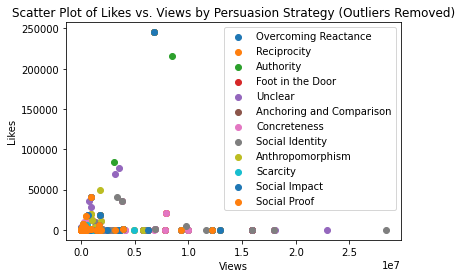

## Engagement Metrics

### KPIs

In [109]:
graphs_v = []
graphs_l = []
graphs_c = []

num_companies = len(companies)
plot_dicts = []
top_5_likes = []
top_5_comments = []

j = 0
for company, content in companies.items():    
    company_views = {}
    company_likes = {}
    company_comments = {}
    video_frequency = {}
    for pers in persuasions:
        company_views[pers] = 0
        company_likes[pers] = 0
        company_comments[pers] = 0
        video_frequency[pers] = 0

    for video, values in content["videos"].items():
        strats = values["annots"]
        viewcount = values["viewCount"]
        likecount = values["likeCount"]
        commentcount = values["commentCount"]
        for strat in strats:
            video_frequency[strat] += 1
            company_views[strat] += viewcount
            company_likes[strat] += likecount
            company_comments[strat] += commentcount
    
#     for key in company_views:
#         if video_frequency[key] != 0:
#             company_views[key] /= video_frequency[key]
#             company_likes[key] /= video_frequency[key]
    
    strat_names = []
    v = []
    l = []
    c = []
    for key in company_views:
        if company_views[key] == 0 and company_likes[key] == 0:
            pass
        else:
            strat_names.append(key)
            v.append(company_views[key])
            l.append(company_likes[key])
            c.append(company_comments[key])
    if j == 0:
        visible_action = True
    else:
        visible_action = False
            
    g_v = go.Pie(labels=strat_names, values=v, name = company, visible = visible_action)
    graphs_v.append(g_v)
    
    g_l = go.Pie(labels=strat_names, values=l, name = company, visible = visible_action)
    graphs_l.append(g_l)
    
    g_c = go.Pie(labels=strat_names, values=c, name = company, visible = visible_action)
    graphs_c.append(g_c)
    
    if company in top_5_company_names:
        top_5_likes.append(g_l)
        top_5_comments.append(g_c)

    visibility = [False]*num_companies
    visibility[j] = True
    d = dict(args=[{"visible": visibility}, {"title": company + " (" + str(content["count"]) + ")"}], 
             label=company + " (" + str(content["count"]) + ")", method="update")
    plot_dicts.append(d)
    j+=1

KeyError: 'commentCount'

**Views**

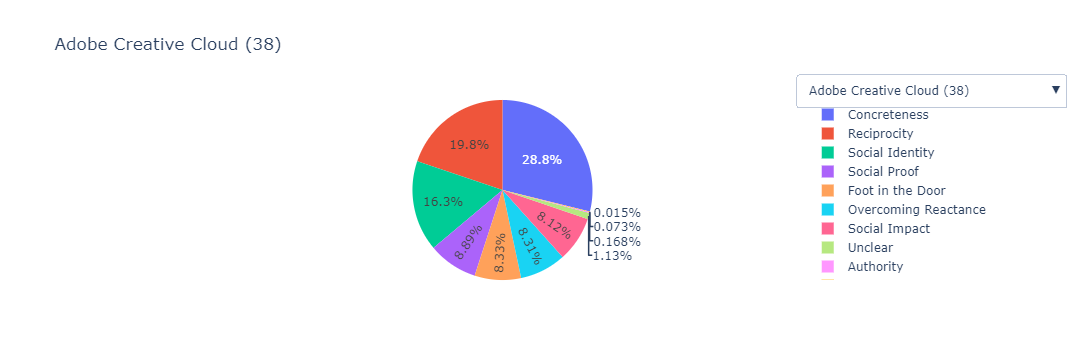

In [23]:
fig = go.Figure(data = graphs_v)
fig.update_layout(
    updatemenus=[dict(buttons= plot_dicts,
                      pad={"r": 10, "t": 10},
                      showactive=True,
                      x=1,
                      xanchor="left",
                      y=1.2,
                      yanchor="top")]
)
fig.show()
# plotly.offline.plot({"data": fig}, filename = "Trend of number of views per video gathered by each company.html")

**Likes**

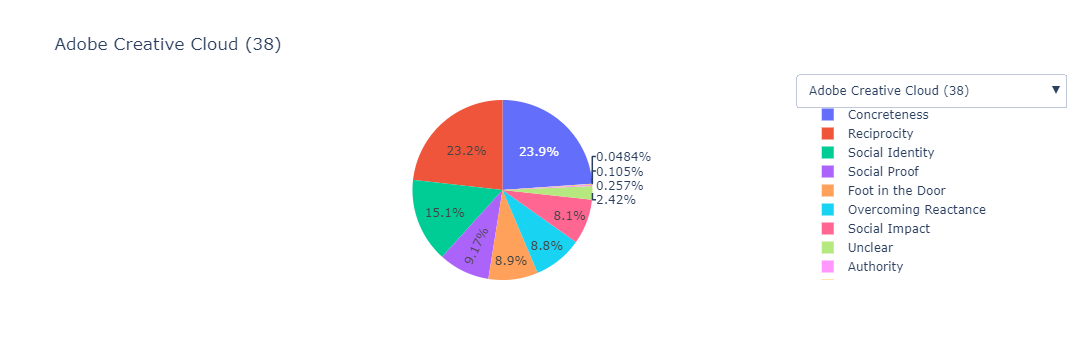

In [24]:
fig = go.Figure(data = graphs_l)
fig.update_layout(
    updatemenus=[dict(buttons= plot_dicts,
                      pad={"r": 10, "t": 10},
                      showactive=True,
                      x=1,
                      xanchor="left",
                      y=1.2,
                      yanchor="top")]
)
fig.show()
# plotly.offline.plot({"data": fig}, filename = "Trend of number of likes per video gathered by each company.html")

**Comments**

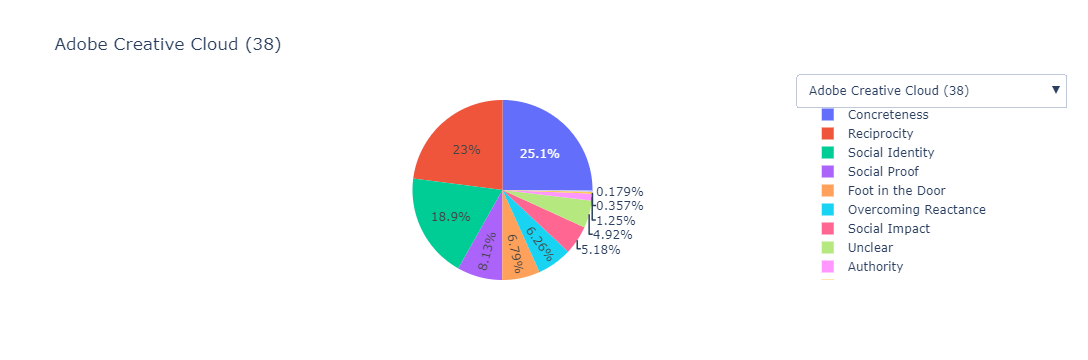

In [34]:
fig = go.Figure(data = graphs_c)
fig.update_layout(
    updatemenus=[dict(buttons= plot_dicts,
                      pad={"r": 10, "t": 10},
                      showactive=True,
                      x=1,
                      xanchor="left",
                      y=1.2,
                      yanchor="top")]
)
fig.show()
# plotly.offline.plot({"data": fig}, filename = "Trend of number of likes per video gathered by each company.html")

### Outreach Metric

In [35]:
graphs_o = []

num_companies = len(companies)
plot_dicts = []
top_5_outreach = []
j = 0

for company, content in companies.items():    
    company_views = {}
    company_outreach = {}
    video_frequency = {}
    for pers in persuasions:
        company_views[pers] = 0
        video_frequency[pers] = 0

    for video, values in content["videos"].items():
        strats = values["annots"]
        viewcount = values["viewCount"]
        for strat in strats:
            video_frequency[strat] += 1
            company_views[strat] += viewcount
            company_outreach[strat] = 0
    
    for strat in company_views:
        if video_frequency[strat] != 0:
            company_outreach[strat] = company_views[strat]/video_frequency[strat]
    
    strat_names = []
    o = []
    
    for key in company_views:
        if company_views[key] == 0:
            pass
        else:
            strat_names.append(key)
            o.append(company_outreach[key])

    if j == 0:
        visible_action = True
    else:
        visible_action = False
            
    g_o = go.Pie(labels=strat_names, values=o, name = company, visible = visible_action)
    graphs_o.append(g_o)
    
    if company in top_5_company_names:
        top_5_outreach.append(g_o)

    visibility = [False]*num_companies
    visibility[j] = True
    d = dict(args=[{"visible": visibility}, {"title": company + " (" + str(content["count"]) + ")"}], 
             label=company + " (" + str(content["count"]) + ")", method="update")
    plot_dicts.append(d)
    j+=1

In [63]:
print(graphs_o[0])

Pie({
    'labels': [Social Identity, Concreteness, Anchoring and Comparison, Overcoming
               Reactance, Reciprocity, Foot in the Door, Authority, Unclear],
    'name': '3M',
    'values': [6676.333333333333, 6676.333333333333, 10523.0, 6467.666666666667,
               5797.75, 6467.666666666667, 6842.5, 1315218.0],
    'visible': True
})


In [73]:
print(top_5_outreach[0])

Pie({
    'labels': [Social Identity, Concreteness, Anchoring and Comparison, Overcoming
               Reactance, Reciprocity, Foot in the Door, Authority, Social Impact,
               Anthropomorphism, Social Proof, Unclear],
    'name': 'Adobe Creative Cloud',
    'values': [250653.53846153847, 250905.26086956522, 7301.0, 151179.45454545456,
               220255.27777777778, 128223.07692307692, 6725.2, 541577.0, 1500.0,
               296472.6666666667, 32371.85714285714],
    'visible': False
})


In [66]:
top_3_strategies_outreach = {}
n = 3

for company in graphs_o:
    top_3_strategies_outreach[company["name"]] = []
    for i in range(n):
        top_3_strategies_outreach[company["name"]].append(company["labels"][i])

In [69]:
top_3_strategies_outreach = {}
n = 3

for company in graphs_o:
    top_n_strategies = []

    sorted_indices = sorted(range(len(company["values"])), key=lambda i: company["values"][i], reverse=True)

    for i in range(n):
        if i < len(sorted_indices):
            top_n_strategies.append(company["labels"][sorted_indices[i]])

    top_3_strategies_outreach[company["name"]] = top_n_strategies
    break

In [70]:
print(top_3_strategies_outreach)

{'3M': ['Unclear', 'Anchoring and Comparison', 'Authority']}


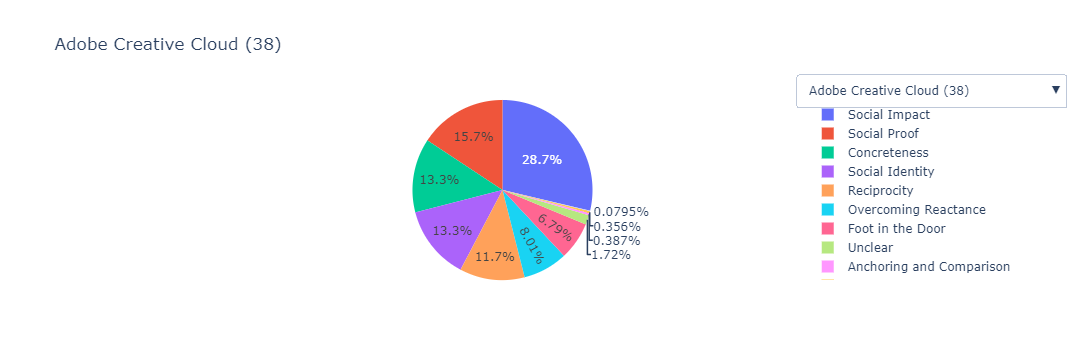

In [36]:
fig = go.Figure(data = graphs_o)
fig.update_layout(
    updatemenus=[dict(buttons= plot_dicts,
                      pad={"r": 10, "t": 10},
                      showactive=True,
                      x=1,
                      xanchor="left",
                      y=1.2,
                      yanchor="top")]
)
fig.show()
# plotly.offline.plot({"data": fig}, filename = "Trend of number of likes per video gathered by each company.html")

### Engagement Metric

In [33]:
graphs_v = []
graphs_l = []
graphs_c = []
graphs_e = []

num_companies = len(companies)
plot_dicts = []
top_5_likes = []
top_5_comments = []
top_5_engagements = []

j = 0
for company, content in companies.items():    
    company_views = {}
    company_likes = {}
    company_comments = {}
    company_engagement = {}
    video_frequency = {}
    for pers in persuasions:
        company_views[pers] = 0
        company_likes[pers] = 0
        company_comments[pers] = 0
        video_frequency[pers] = 0

    for video, values in content["videos"].items():
        strats = values["annots"]
        viewcount = values["viewCount"]
        likecount = values["likeCount"]
        commentcount = values["commentCount"]
        for strat in strats:
            video_frequency[strat] += 1
            company_views[strat] += viewcount
            company_likes[strat] += likecount
            company_comments[strat] += commentcount
            company_engagement[strat] = 0
    
    for strat in company_views:
        if company_views[strat] != 0 and video_frequency != 0:
            company_engagement[strat] = ((company_likes[strat] + company_comments[strat])/company_views[strat])*video_frequency[strat]
            # company_engagement[strat] = ((company_likes[strat] + company_comments[strat])/company_views[strat])/video_frequency[strat]
    
    strat_names = []
    v = []
    l = []
    c = []
    e = []
    
    for key in company_views:
        if company_views[key] == 0:
            pass
        else:
            strat_names.append(key)
            v.append(company_views[key])
            l.append(company_likes[key])
            c.append(company_comments[key])
            e.append(company_engagement[key])
    if j == 0:
        visible_action = True
    else:
        visible_action = False
            
    g_e = go.Pie(labels=strat_names, values=e, name = company, visible = visible_action)
    graphs_e.append(g_e)
    
    if company in top_5_company_names:
        top_5_likes.append(g_l)
        top_5_comments.append(g_c)
        top_5_engagements.append(g_e)

    visibility = [False]*num_companies
    visibility[j] = True
    d = dict(args=[{"visible": visibility}, {"title": company + " (" + str(content["count"]) + ")"}], 
             label=company + " (" + str(content["count"]) + ")", method="update")
    plot_dicts.append(d)
    j+=1

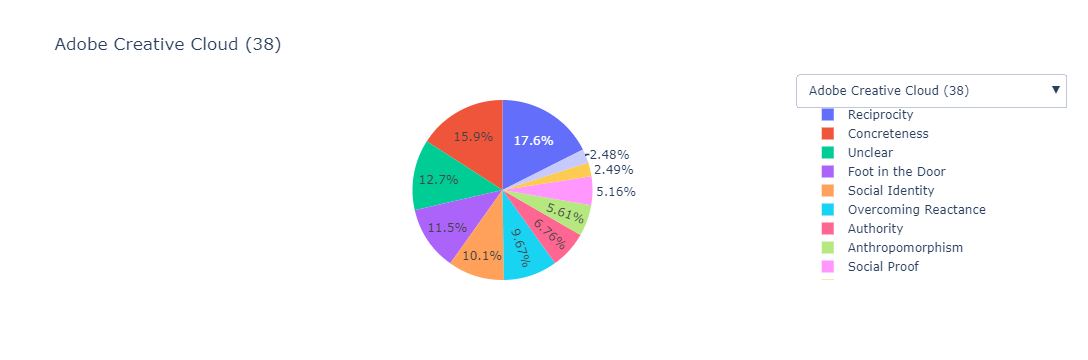

In [55]:
fig = go.Figure(data = graphs_e)
fig.update_layout(
    updatemenus=[dict(buttons= plot_dicts,
                      pad={"r": 10, "t": 10},
                      showactive=True,
                      x=1,
                      xanchor="left",
                      y=1.2,
                      yanchor="top")]
)
fig.show()
# plotly.offline.plot({"data": fig}, filename = "Trend of number of likes per video gathered by each company.html")

In [79]:
for i in range(5):
    outreach_values = top_5_outreach[i]['values']
    engagement_values = top_5_engagements[i]['values']
    
    cosine_similarity = 1 - cosine(outreach_values, engagement_values)
    
    print(f"Cosine similarity between Outreach Values and Engagement Values for {top_5_outreach[i]['name']}: {cosine_similarity:.2f}")

Cosine similarity between Outreach Values and Engagement Values for Adobe Creative Cloud: 0.63
Cosine similarity between Outreach Values and Engagement Values for Netflix: 0.85
Cosine similarity between Outreach Values and Engagement Values for Viacom18 Studios: 0.21
Cosine similarity between Outreach Values and Engagement Values for Walt Disney Studios: 0.83
Cosine similarity between Outreach Values and Engagement Values for ultabeauty: 0.10


In [36]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import preprocessing

cosine_similarities = {}
engagement_vector = {}
outreach_vector = {}

for persuasion in persuasions:
    cosine_similarities[persuasion] = [[0] * len(graphs_e)] * 2

for i in range(len(graphs_e)):
    for index, p in enumerate(graphs_e[i]['labels']):
        cosine_similarities[p][1][i] = graphs_e[i]['values'][index]

for persuasion in persuasions:
    engagement_vector[persuasion] = cosine_similarities[persuasion][1].copy()
    engagement_vector[persuasion] = preprocessing.normalize([engagement_vector[persuasion]])[0]

for i in range(len(graphs_o)):
    for index, p in enumerate(graphs_o[i]['labels']):
        cosine_similarities[p][0][i] = graphs_o[i]['values'][index]

for persuasion in persuasions:
    outreach_vector[persuasion] = cosine_similarities[persuasion][0]
    outreach_vector[persuasion] = preprocessing.normalize([outreach_vector[persuasion]])[0]

In [37]:
for p in persuasions:
    cosine_similarity = (1 - cosine(outreach_vector[p], engagement_vector[p]))   
    print(f"Cosine similarity between Outreach Values and Engagement Values for {p}: {cosine_similarity:.3f}")

Cosine similarity between Outreach Values and Engagement Values for Social Identity: 0.070
Cosine similarity between Outreach Values and Engagement Values for Concreteness: 0.054
Cosine similarity between Outreach Values and Engagement Values for Anchoring and Comparison: 0.164
Cosine similarity between Outreach Values and Engagement Values for Overcoming Reactance: 0.065
Cosine similarity between Outreach Values and Engagement Values for Reciprocity: 0.037
Cosine similarity between Outreach Values and Engagement Values for Foot in the Door: 0.039
Cosine similarity between Outreach Values and Engagement Values for Authority: 0.049
Cosine similarity between Outreach Values and Engagement Values for Social Impact: 0.082
Cosine similarity between Outreach Values and Engagement Values for Anthropomorphism: 0.083
Cosine similarity between Outreach Values and Engagement Values for Scarcity: 0.012
Cosine similarity between Outreach Values and Engagement Values for Social Proof: 0.022
Cosine s

In [522]:
for i in range(len(graphs_o)):
    outreach_values = graphs_o[i]['values']
    engagement_values = graphs_e[i]['values']
    
    cosine_similarity = 1 - cosine(outreach_values, engagement_values)
    
    print(f"Cosine similarity between Outreach Values and Engagement Values for {graphs_o[i]['name']}: {cosine_similarity:.2f}")

## Market Basket Analysis

In [164]:
company_strategies = {}
for company, content in companies.items():
    company_strategies[company] = set()
    for video, values in content["videos"].items():
        for strat in values["annots"]:
            company_strategies[company].add(strat)

company_strategies = {company: list(strategies) for company, strategies in company_strategies.items()}

In [171]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

def binarize_data(companies, persuasions):
    binary_data = []
    for company, data in companies.items():
        transaction = [1 if persuasion in data else 0 for persuasion in persuasions]
        binary_data.append(transaction)
    return binary_data

# Perform Apriori analysis
def perform_apriori(binary_data, min_support=0.1, min_confidence=0.5):
    df = pd.DataFrame(binary_data, columns=persuasions)
    frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=min_confidence)
    return rules

# Example usage
binary_data = binarize_data(company_strategies, persuasions)
rules = perform_apriori(binary_data, min_support=0.5, min_confidence=0.8)

D:\Softwares\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [172]:
rules

antecedents  \
0                          (Social Identity)   
1                             (Concreteness)   
2                     (Overcoming Reactance)   
3                          (Social Identity)   
4                              (Reciprocity)   
5                          (Social Identity)   
6                          (Social Identity)   
7                         (Foot in the Door)   
8                                (Authority)   
9                          (Social Identity)   
10                    (Overcoming Reactance)   
11                            (Concreteness)   
12                             (Reciprocity)   
13                            (Concreteness)   
14                            (Concreteness)   
15                        (Foot in the Door)   
16                               (Authority)   
17                            (Concreteness)   
18                    (Overcoming Reactance)   
19                             (Reciprocity)   
20                    (Overcoming Reactance)   
21                        (Foot in the Door)   
22                    (Overcoming Reactance)   
23                               (Authority)   
24   (Overcoming Reactance, Social Identity)   
25      (Overcoming Reactance, Concreteness)   
26           (Social Identity, Concreteness)   
27                    (Overcoming Reactance)   
28                         (Social Identity)   
29                            (Concreteness)   
30           (Social Identity, Concreteness)   
31       (Social Identity, Foot in the Door)   
32          (Concreteness, Foot in the Door)   
33                         (Social Identity)   
34                            (Concreteness)   
35                        (Foot in the Door)   
36              (Authority, Social Identity)   
37                 (Authority, Concreteness)   
38           (Social Identity, Concreteness)   
39                               (Authority)   
40                         (Social Identity)   
41                            (Concreteness)   
42   (Overcoming Reactance, Social Identity)   
43  (Overcoming Reactance, Foot in the Door)   
44       (Social Identity, Foot in the Door)   
45                    (Overcoming Reactance)   
46                         (Social Identity)   
47                        (Foot in the Door)   
48      (Overcoming Reactance, Concreteness)   
49  (Overcoming Reactance, Foot in the Door)   
50          (Concreteness, Foot in the Door)   
51                    (Overcoming Reactance)   
52                            (Concreteness)   
53                        (Foot in the Door)   

                                 consequents  antecedent support  \
0                             (Concreteness)            0.766667   
1                          (Social Identity)            0.880000   
2                          (Social Identity)            0.686667   
3                     (Overcoming Reactance)            0.766667   
4                          (Social Identity)            0.600000   
5                              (Reciprocity)            0.766667   
6                         (Foot in the Door)            0.766667   
7                          (Social Identity)            0.620000   
8                          (Social Identity)            0.640000   
9                                (Authority)            0.766667   
10                            (Concreteness)            0.686667   
11                    (Overcoming Reactance)            0.880000   
12                            (Concreteness)            0.600000   
13                             (Reciprocity)            0.880000   
14                        (Foot in the Door)            0.880000   
15                            (Concreteness)            0.620000   
16                            (Concreteness)            0.640000   
17                               (Authority)            0.880000   
18                             (Reciprocity)            0.686667   
19                    (Overcomin

In [193]:
# Create an empty set to store unique combinations
unique_combinations = set()

# Iterate through the rules and add unique combinations to the set
for i in range(54):
    antecedents = list(rules.iloc[i]['antecedents'])
    consequents = list(rules.iloc[i]['consequents'])
    
    combs = []
    for a in antecedents:
        combs.append(a)
        
    for c in consequents:
        combs.append(c)
    
    # Convert the list to a frozenset to make it hashable
    comb_set = frozenset(combs)
    
    unique_combinations.add(comb_set)

# Convert the unique combinations back to lists if needed
# unique_combinations = [list(comb_set) for comb_set in unique_combinations]

In [190]:
# print(unique_combinations)

[['Reciprocity', 'Social Identity'], ['Overcoming Reactance', 'Social Identity'], ['Social Identity', 'Concreteness']]


In [194]:
# Create a dictionary to store the accumulated likeCount for each unique combination
combination_likes = {comb: 0 for comb in unique_combinations}

for company, content in companies.items():
    for video, values in content["videos"].items():
        video_strats = values["annots"]
        for combin in unique_combinations:
            if all(strat in video_strats for strat in combin):
                # If all strategies in the unique combination are present in the video, accumulate likeCount
                combination_likes[combin] += values["likeCount"]

In [205]:
df_combination_likes = pd.DataFrame(list(combination_likes.items()), columns=["Combination", "Likes"])

# Sort the DataFrame by Likes in descending order
df_combination_likes = df_combination_likes.sort_values(by="Likes", ascending=False)

# Reset the index for the sorted DataFrame
df_combination_likes = df_combination_likes.reset_index(drop=True)

In [227]:
df_combination_likes

Combination                                         Likes 
0                     (Social Identity, Concreteness)  434687
1                           (Authority, Concreteness)  364161
2                    (Concreteness, Foot in the Door)  349448
3            (Overcoming Reactance, Foot in the Door)  343388
4                        (Authority, Social Identity)  327461
5                (Overcoming Reactance, Concreteness)  324986
6          (Authority, Social Identity, Concreteness)  324713
7   (Overcoming Reactance, Concreteness, Foot in t...  319718
8                 (Social Identity, Foot in the Door)  311431
9   (Social Identity, Concreteness, Foot in the Door)  309844
10            (Overcoming Reactance, Social Identity)  309550
11  (Overcoming Reactance, Social Identity, Concre...  306120
12  (Overcoming Reactance, Social Identity, Foot i...  305307
13                  (Overcoming Reactance, Authority)  291451
14                        (Reciprocity, Concreteness)  156416
15                     (Reciprocity, Social Identity)   89927
16                (Overcoming Reactance, Reciprocity)   71306